In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# 1.1. Join DataFrame

Leer Manualmente el archivo datos_join.txt, ahí se encuentran tres diccionarios para crear tres DataFrame(DF).


In [59]:
data_1 = {
        'id': ['1', '2', '3', '4', '5'],
        'primer_nombre': ['Alex', 'Amy', 'Valentina', 'Alice', 'Lina'], 
        'apellido': ['Anderson', 'Ruales', 'Marin', 'Barbosa', 'Robles']}

data_2 = {
        'id': ['4', '5', '6', '7', '8'],
        'primer_nombre': ['Luis', 'Brian', 'Mariana', 'Marcela', 'Carlos'], 
        'apellido': ['Ruiz', 'Giralgo', 'Ortegon', 'Palacios', 'Gallego']}

data_3 = {
        'id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}


Crear 3 DF con los anteriores diccionarios y asignarlos a 3 variables.


In [62]:
df1 = pd.DataFrame(data_1)
df2 = pd.DataFrame(data_2)
df3 = pd.DataFrame(data_3)

Unir 2 DF a lo largo de filas y asignar todos los datos.


In [65]:
df22 = pd.concat([df1, df2])
df22

id primer_nombre  apellido
0  1          Alex  Anderson
1  2           Amy    Ruales
2  3     Valentina     Marin
3  4         Alice   Barbosa
4  5          Lina    Robles
0  4          Luis      Ruiz
1  5         Brian   Giralgo
2  6       Mariana   Ortegon
3  7       Marcela  Palacios
4  8        Carlos   Gallego

Unir 2 DF a lo largo de columnas y asignar todos los datos de las columnas.

In [67]:
df33 = pd.concat([df1, df2], axis=1)
df33

id primer_nombre  apellido id primer_nombre  apellido
0  1          Alex  Anderson  4          Luis      Ruiz
1  2           Amy    Ruales  5         Brian   Giralgo
2  3     Valentina     Marin  6       Mariana   Ortegon
3  4         Alice   Barbosa  7       Marcela  Palacios
4  5          Lina    Robles  8        Carlos   Gallego

Hacer un merge para todos los datos y el tercer DF con el valor id

In [68]:
df44 = pd.merge(df1, pd.merge(df2, df3, how="outer"), how="outer")
df44

id primer_nombre  apellido  test_id
0    1          Alex  Anderson      NaN
1    2           Amy    Ruales      NaN
2    3     Valentina     Marin      NaN
3    4         Alice   Barbosa      NaN
4    5          Lina    Robles      NaN
5    4          Luis      Ruiz     61.0
6    5         Brian   Giralgo     16.0
7    6       Mariana   Ortegon      NaN
8    7       Marcela  Palacios     14.0
9    8        Carlos   Gallego     15.0
10   1           NaN       NaN     51.0
11   2           NaN       NaN     15.0
12   3           NaN       NaN     15.0
13   9           NaN       NaN      1.0
14  10           NaN       NaN     61.0
15  11           NaN       NaN     16.0

Hacer una merge solo los datos que tienen el mismo ′
id′

In [69]:
df55 = pd.merge(df1, pd.merge(df2, df3, on="id"), on="id")
df55

id primer_nombre_x apellido_x primer_nombre_y apellido_y  test_id
0  4           Alice    Barbosa            Luis       Ruiz       61
1  5            Lina     Robles           Brian    Giralgo       16

# 1.2. GroupBy

Leer el archivos datos_alcohol.txt que se encuentra en la carpeta data


In [70]:
df = pd.read_csv("datos_alcohol.txt")
df

pais  porciones_cerveza  porciones_licor  porciones_vino  \
0    Afghanistan                  0                0               0   
1        Albania                 89              132              54   
2        Algeria                 25                0              14   
3        Andorra                245              138             312   
4         Angola                217               57              45   
..           ...                ...              ...             ...   
188    Venezuela                333              100               3   
189      Vietnam                111                2               1   
190        Yemen                  6                0               0   
191       Zambia                 32               19               4   
192     Zimbabwe                 64               18               4   

     litros_totales_de_alcohol_puro continente  
0                               0.0         AS  
1                               4.9         EU  
2                               0.7         AF  
3                              12.4         EU  
4                               5.9         AF  
..                              ...        ...  
188                             7.7         SA  
189                             2.0         AS  
190                             0.1         AS  
191                             2.5         AF  
192                             4.7         AF  

[193 rows x 6 columns]

¿Qué continente toma más cerveza en promedio?

In [74]:
C = df.groupby("continente")
C["porciones_cerveza"].mean().nlargest(1)

continente
EU    193.777778
Name: porciones_cerveza, dtype: float64

Analizar la columna de vino e imprimir un análisis básico estadístico del consumo.

In [76]:
print(C["porciones_vino"].mean().nlargest())
print(C["porciones_vino"].std().nlargest())

continente
EU    142.222222
SA     62.416667
OC     35.625000
AF     16.264151
AS      9.068182
Name: porciones_vino, dtype: float64
continente
EU    97.421738
SA    88.620189
OC    64.555790
AF    38.846419
AS    21.667034
Name: porciones_vino, dtype: float64


Para cada continente imprime los valores medio, mínimo y máximo para el consumo de licor.

In [80]:
print(C["porciones_licor"].mean())
print(C["porciones_licor"].min())
print(C["porciones_licor"].max())

continente
AF     16.339623
AS     60.840909
EU    132.555556
OC     58.437500
SA    114.750000
Name: porciones_licor, dtype: float64
continente
AF     0
AS     0
EU     0
OC     0
SA    25
Name: porciones_licor, dtype: int64
continente
AF    152
AS    326
EU    373
OC    254
SA    302
Name: porciones_licor, dtype: int64


Para cada continente imprime el consumo medio de alcohol para todas la columnas.

In [81]:
print(C.mean())

            porciones_cerveza  porciones_licor  porciones_vino  \
continente                                                       
AF                  61.471698        16.339623       16.264151   
AS                  37.045455        60.840909        9.068182   
EU                 193.777778       132.555556      142.222222   
OC                  89.687500        58.437500       35.625000   
SA                 175.083333       114.750000       62.416667   

            litros_totales_de_alcohol_puro  
continente                                  
AF                                3.007547  
AS                                2.170455  
EU                                8.617778  
OC                                3.381250  
SA                                6.308333  


# 1.3. Visualización

Leer el archivos visulualizacion.txt que se encuentra en la carpeta data


In [83]:
dfv = pd.read_csv("visulualizacion.txt")
dfv

Unnamed: 0  total_bill   tip     sex smoker   day    time  size
0             0       16.99  1.01  Female     No   Sun  Dinner     2
1             1       10.34  1.66    Male     No   Sun  Dinner     3
2             2       21.01  3.50    Male     No   Sun  Dinner     3
3             3       23.68  3.31    Male     No   Sun  Dinner     2
4             4       24.59  3.61  Female     No   Sun  Dinner     4
..          ...         ...   ...     ...    ...   ...     ...   ...
239         239       29.03  5.92    Male     No   Sat  Dinner     3
240         240       27.18  2.00  Female    Yes   Sat  Dinner     2
241         241       22.67  2.00    Male    Yes   Sat  Dinner     2
242         242       17.82  1.75    Male     No   Sat  Dinner     2
243         243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 8 columns]

Realizar el histograma de la columna total_bill.

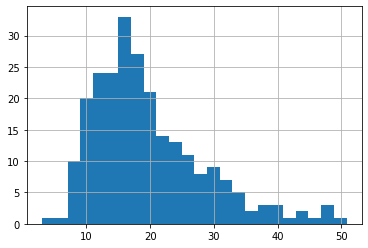

In [85]:
dfv["total_bill"].hist(bins = 24)

Crear un scatter plot presentando la realcion entre total_bill y tip.

In [87]:
dfv.plot.scatter("total_bill", "tip", c="r")

Presentar una relación entre los valores de los days y total_bill.

In [88]:
dfv.plot.scatter("day", "total_bill", c="r")

Cree un bax plot que presente el total_bill por día diferenciando la hora (Cena o Almuerzo).

In [91]:
dfv.boxplot("total_bill", by=["day", "time"], figsize=[10, 5])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


# 2. Monte Carlo

# 2.1. Sistema de N dados


Si los dados se tiran en forma consecutiva uno después del otro.


In [17]:
R1 = []

for i in range(1000000):

  x = np.random.randint(1,7)
  y = np.random.randint(1,7)
  
  r = x+y
  R1.append(r)
  

In [18]:
plt.figure(dpi =120)
plt.hist(R1,bins=110)
plt.xticks(np.linspace(1,12,12),np.linspace(1,12,12))
plt.show()

In [19]:
R2 = []

for i in range(1000000):

  x = np.random.randint(1,7)
  y = np.random.randint(1,7)
  z = np.random.randint(1,7)
  
  r = x+y+z
  R2.append(r)

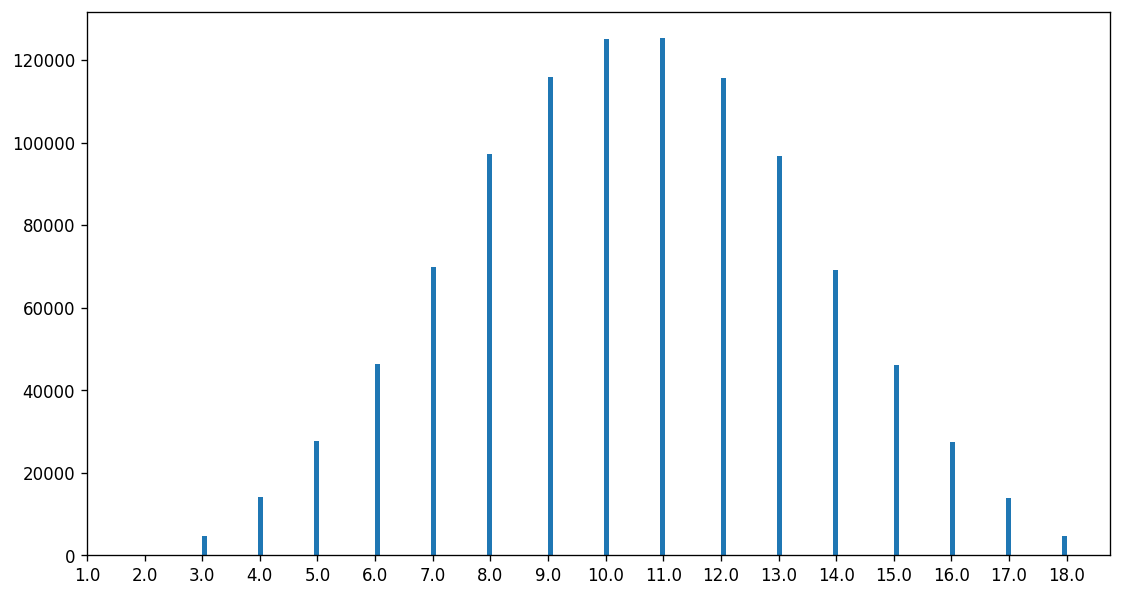

In [20]:
plt.figure(figsize=[11,6], dpi =120)
plt.hist(R2,bins=170)
plt.xticks(np.linspace(1,18,18),np.linspace(1,18,18))
plt.show()

In [21]:
R3 = []

for i in range(1000000):

  x = np.random.randint(1,7)
  y = np.random.randint(1,7)
  z = np.random.randint(1,7)
  w = np.random.randint(1,7)

  r = x+y+z+w
  R3.append(r)

In [22]:
plt.figure(figsize=[11,6], dpi =120)
plt.hist(R3,bins=230)
plt.xticks(np.linspace(1,24,24),np.linspace(1,24,24))
plt.show()

Forma simultanea.


In [23]:
R11 = []

for i in range(1000000):

  x = np.random.randint(1,7, 2)

  
  r = sum(x)
  R11.append(r)

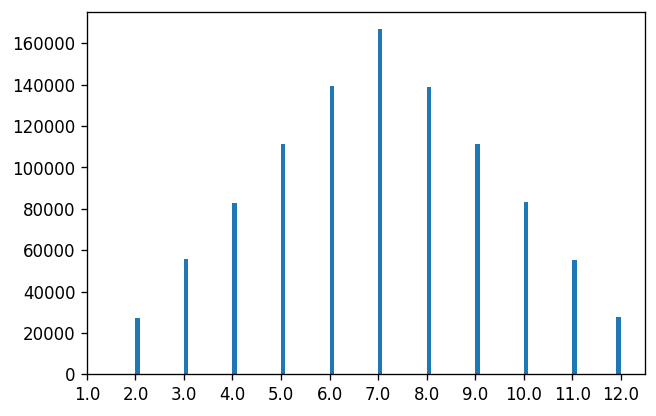

In [24]:
plt.figure(dpi =120)
plt.hist(R11,bins=110)
plt.xticks(np.linspace(1,12,12),np.linspace(1,12,12))
plt.show()

In [25]:
R22 = []

for i in range(1000000):

  x = np.random.randint(1,7, 3)

  
  r = sum(x)
  R22.append(r)

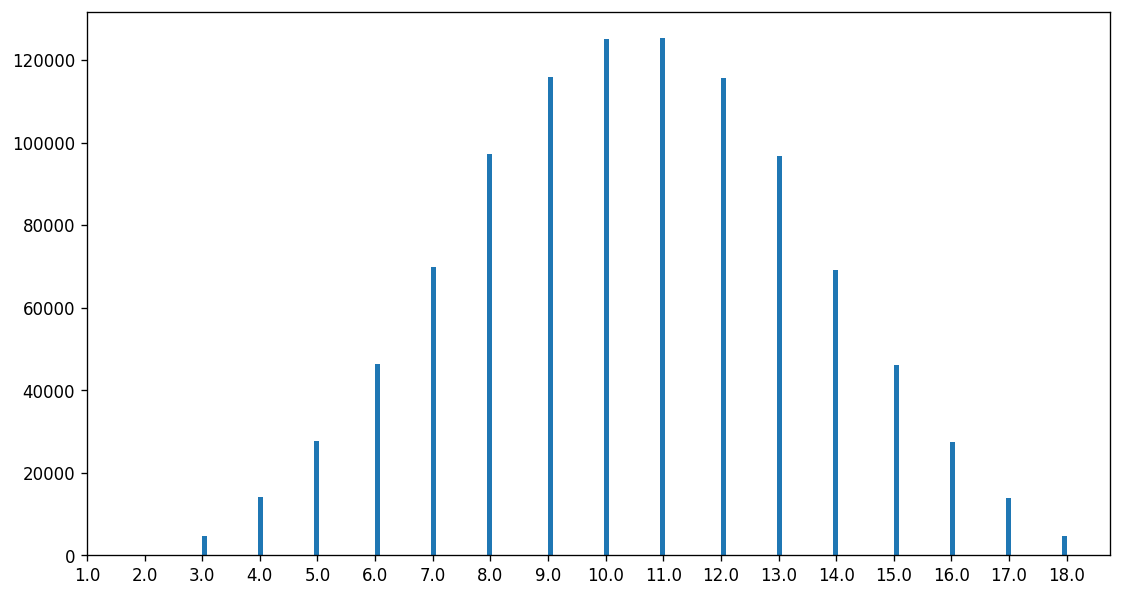

In [26]:
plt.figure(figsize=[11,6], dpi =120)
plt.hist(R2,bins=170)
plt.xticks(np.linspace(1,18,18),np.linspace(1,18,18))
plt.show()

In [27]:
R33 = []

for i in range(1000000):

  x = np.random.randint(1,7, 4)

  r = sum(x)
  R33.append(r)

In [28]:
plt.figure(figsize=[11,6], dpi =120)
plt.hist(R33,bins=230)
plt.xticks(np.linspace(1,24,24),np.linspace(1,24,24))
plt.show()

# 2.2. LHC


In [56]:
def ProbabilidadColicion(N, rp):
  R=100
  points = []
  points2 = []
  for i in range(N):
     x = np.random.uniform(-R,R)
     y = np.random.uniform(-R,R)
     r = np.sqrt((x**2 + y**2))
     x2 = np.random.uniform(-R,R)
     y2 = np.random.uniform(-R,R)
     r2 = np.sqrt((x2**2 + y2**2))
     if r<= R:
         points.append([x, y])
     if r2<= R:
         points2.append([x2, y2])
  c = []
  for i in range(len(points)):
     for j in range(len(points2)):
         if (np.sign(points[i]) == np.sign(points2[j])).all() and np.sqrt((points[i][0] - points2[j][0])**2 + (points[i][1] - points2[j][1])**2) <= 2*rp:
             c.append(j)
             points2.pop(j)
             break
  return print("La probabilidad de que ocurra una colisión para una partícula de radio: ", rp, " es de ", (len(c)*100)/N, "%")

In [58]:
ProbabilidadColicion(10000, 1)
ProbabilidadColicion(10000, 0.01)
ProbabilidadColicion(10000, 0.0001)

La probabilidad de que ocurra una colisión para una partícula de radio:  1  es de  58.2 %
La probabilidad de que ocurra una colisión para una partícula de radio:  0.01  es de  0.01 %
La probabilidad de que ocurra una colisión para una partícula de radio:  0.0001  es de  0.0 %
